# Problem 3

# Libraries

In [1]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import requests
import shutil
from google.colab import files, drive
%matplotlib inline

# Import dataset

>NOTE: Before running notebook, mount drive with your own kaggle.json file

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

In [3]:
!ls

drive  sample_data


In [4]:
!kaggle datasets download -d longnguyen2306/bacteria-detection-with-darkfield-microscopy

 95% 154M/162M [00:02<00:00, 48.6MB/s]
100% 162M/162M [00:02<00:00, 65.5MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

# Preview images

Text(0.5, 1.0, 'Image')

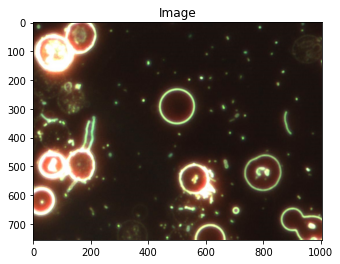

In [6]:
filename = '100.png' # You can pick a file from 001.png to 366.png
image = cv2.imread("/content/images/"+filename)

plt.imshow(image)
plt.title('Image')

# Functions

## Morphological

In [7]:
def morpho(filename):

  # Get image
  image = cv2.imread("/content/images/"+filename)
  grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Scale image
  scaled_img = cv2.resize(grayscale, (428, 426))

  # 2-bit image
  ret, img_2bit = cv2.threshold(scaled_img,150,200,cv2.THRESH_BINARY_INV)
  img_2bit = np.array(img_2bit)

  s_1 = np.uint8([[0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0],
                  [1, 1, 1, 1, 1],
                  [0, 0, 1, 0, 0], 
                  [0, 0, 1, 0, 0], 
                  ])

  s_2 = np.uint8([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]
                  ])

  # Erode the image
  img_cross_ero = cv2.erode(img_2bit, s_1, iterations = 1)

  # Dilate the image
  img_cross_dil = cv2.dilate(img_cross_ero, s_2, iterations = 1)

  # plt.imshow(img_cross_dil, cmap='gray')

  return img_cross_dil


## Contour counter

In [8]:
def bacterias_res(filename):
  pp_img = morpho(filename)
  contours, hierarchy = cv2.findContours(pp_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  return len(contours)

# Creating dataset

In [9]:
files = list(range(1,367))
files = [str(x)+'.png' for x in files]
files = ['00'+x if len(x)==5 else x for x in files ]
files = ['0'+x if len(x)==6 else x for x in files ]
# files
conts = [bacterias_res(x) for x in files]
# conts

In [ ]:
results = [1 if x>20 else 0 for x in conts]
# results

In [27]:
imgs = [morpho(x) for x in files]

In [28]:
df = pd.DataFrame(zip(files, imgs, conts, results), columns=['Filename', 'Images', 'Contour', 'Contaminated'])
df

,Filename,Images,Contour,Contaminated
0,001.png,"[[200, 200, 200, 200, 200, 200, 200, 200, 200,...",87,1
1,002.png,"[[200, 200, 200, 200, 200, 200, 200, 200, 200,...",9,0
2,003.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 200, 200, ...",9,0
3,004.png,"[[200, 200, 200, 200, 200, 200, 200, 200, 200,...",16,0
4,005.png,"[[200, 200, 200, 200, 200, 200, 200, 200, 200,...",13,0
...,...,...,...,...
361,362.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 200,...",69,1
362,363.png,"[[200, 200, 200, 200, 200, 200, 200, 200, 200,...",95,1
363,364.png,"[[200, 200, 200, 200, 200, 200, 200, 200, 200,...",57,1
364,365.png,"[[200, 200, 200, 200, 200, 200, 200, 200, 200,...",41,1


<BarContainer object of 2 artists>

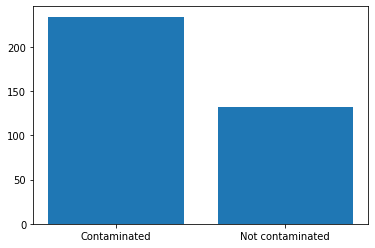

In [35]:
plt.bar(['Contaminated','Not contaminated'], [list(df['Contaminated']).count(1), list(df['Contaminated']).count(0)])

# Prediction

Contaminated


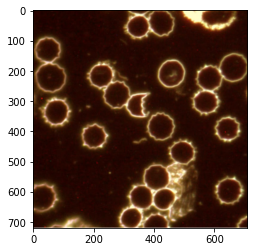

In [45]:
num = 0 #@param {type:"slider", min:0, max:365, step:1}

print({True:'Contaminated', False:'Not contaminated'}[bacterias_res(files[num])>20])
plt.imshow(cv2.imread("/content/images/"+files[num]))